In [3]:
import bct

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
mat_path = r"C:\Users\ANEL\OneDrive\Escritorio\BCT\2019_03_03_BCT\data_and_demos\fve32.mat"

In [5]:
mat_json = scipy.io.loadmat(mat_path)

In [6]:
mat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dictmat_dict = {k:v for k, v in mat_json.items() if k[0] != '_'}
mat_dict

{'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

In [7]:
mat_dict.keys()

dict_keys(['Names', 'CIJ'])

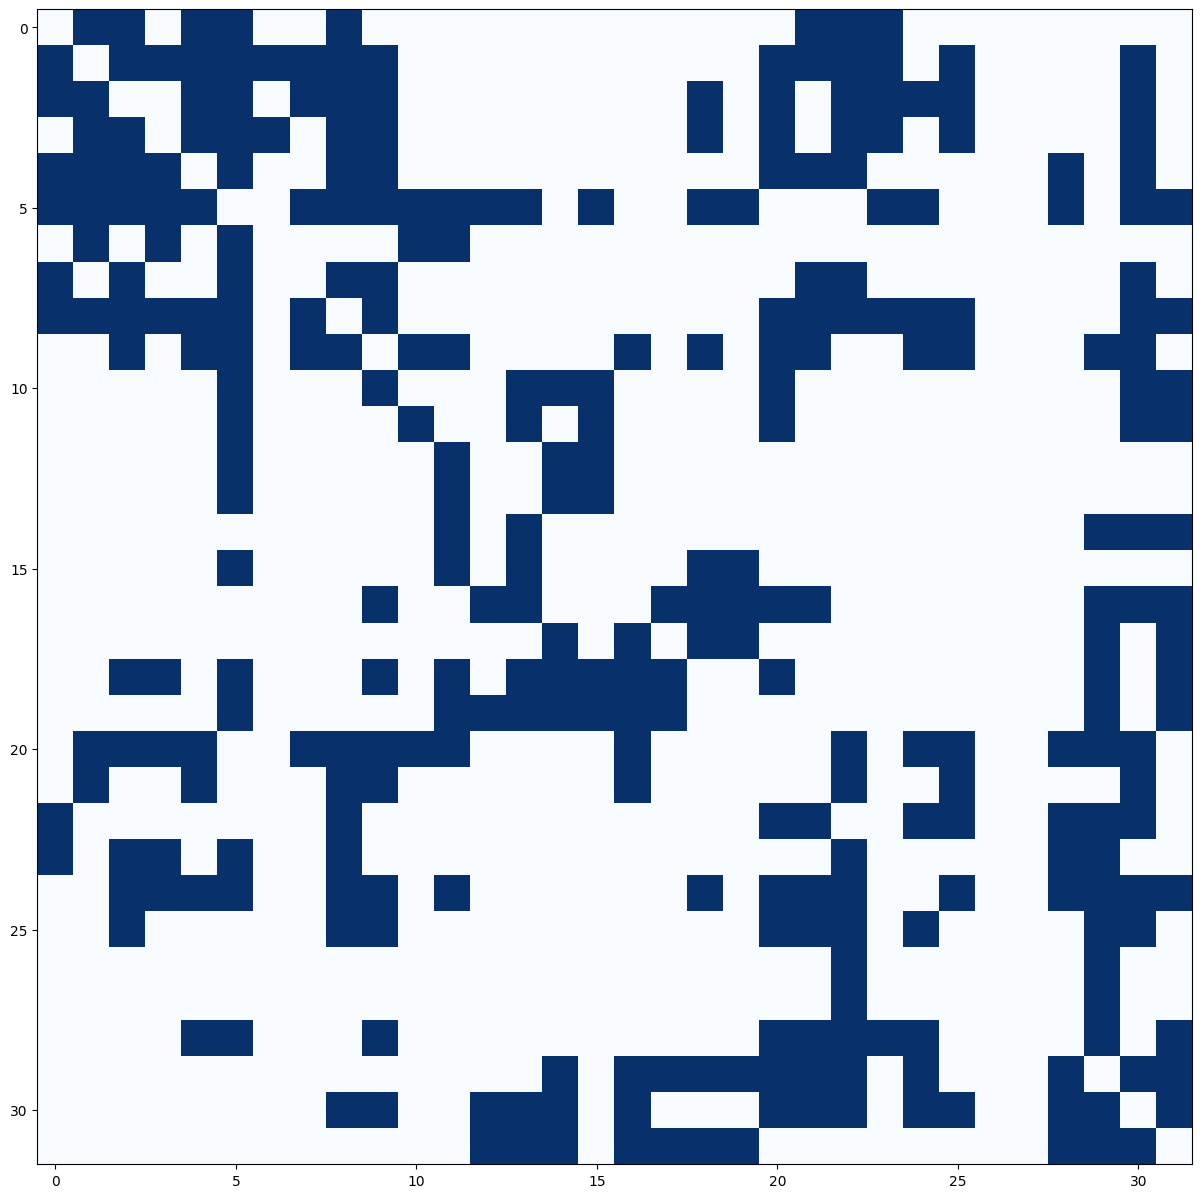

In [8]:
# mapa de calor de la matriz de activación

fig = plt.figure(figsize=(15, 15))

plt.imshow(mat_dict['CIJ'], cmap='Blues', interpolation='nearest')
plt.show()

In [9]:
import networkx as nx

In [10]:
G1 = nx.from_numpy_array(mat_dict['CIJ'])
G1.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1}), (0, 2, {'weight': 1}), (0, 4, {'weight': 1}), (0, 5, {'weight': 1}), (0, 8, {'weight': 1}), (0, 21, {'weight': 1}), (0, 22, {'weight': 1}), (0, 23, {'weight': 1}), (0, 7, {'weight': 1}), (1, 2, {'weight': 1}), (1, 3, {'weight': 1}), (1, 4, {'weight': 1}), (1, 5, {'weight': 1}), (1, 6, {'weight': 1}), (1, 7, {'weight': 1}), (1, 8, {'weight': 1}), (1, 9, {'weight': 1}), (1, 20, {'weight': 1}), (1, 21, {'weight': 1}), (1, 22, {'weight': 1}), (1, 23, {'weight': 1}), (1, 25, {'weight': 1}), (1, 30, {'weight': 1}), (2, 4, {'weight': 1}), (2, 5, {'weight': 1}), (2, 7, {'weight': 1}), (2, 8, {'weight': 1}), (2, 9, {'weight': 1}), (2, 18, {'weight': 1}), (2, 20, {'weight': 1}), (2, 22, {'weight': 1}), (2, 23, {'weight': 1}), (2, 24, {'weight': 1}), (2, 25, {'weight': 1}), (2, 30, {'weight': 1}), (2, 3, {'weight': 1}), (3, 4, {'weight': 1}), (3, 5, {'weight': 1}), (3, 6, {'weight': 1}), (3, 8, {'weight': 1}), (3, 9, {'weight': 1}), (3, 18, {'weight': 1}), (3,

In [11]:
node_labels = {idx: mat_dict['Names'][idx] for idx in range(len(mat_dict['CIJ']))}
node_labels

{0: np.str_('  V1'),
 1: np.str_('  V2'),
 2: np.str_('  V3'),
 3: np.str_('  VP'),
 4: np.str_(' V3a'),
 5: np.str_('  V4'),
 6: np.str_(' VOT'),
 7: np.str_(' V4t'),
 8: np.str_('  MT'),
 9: np.str_(' FST'),
 10: np.str_('PITd'),
 11: np.str_('PITv'),
 12: np.str_('CITd'),
 13: np.str_('CITv'),
 14: np.str_('AITd'),
 15: np.str_('AITv'),
 16: np.str_('STPp'),
 17: np.str_('STPa'),
 18: np.str_('  TF'),
 19: np.str_('  TH'),
 20: np.str_('MSTd'),
 21: np.str_('MSTl'),
 22: np.str_('  PO'),
 23: np.str_(' PIP'),
 24: np.str_(' LIP'),
 25: np.str_(' VIP'),
 26: np.str_(' MIP'),
 27: np.str_(' MDP'),
 28: np.str_('  DP'),
 29: np.str_('  7a'),
 30: np.str_(' FEF'),
 31: np.str_('  46')}

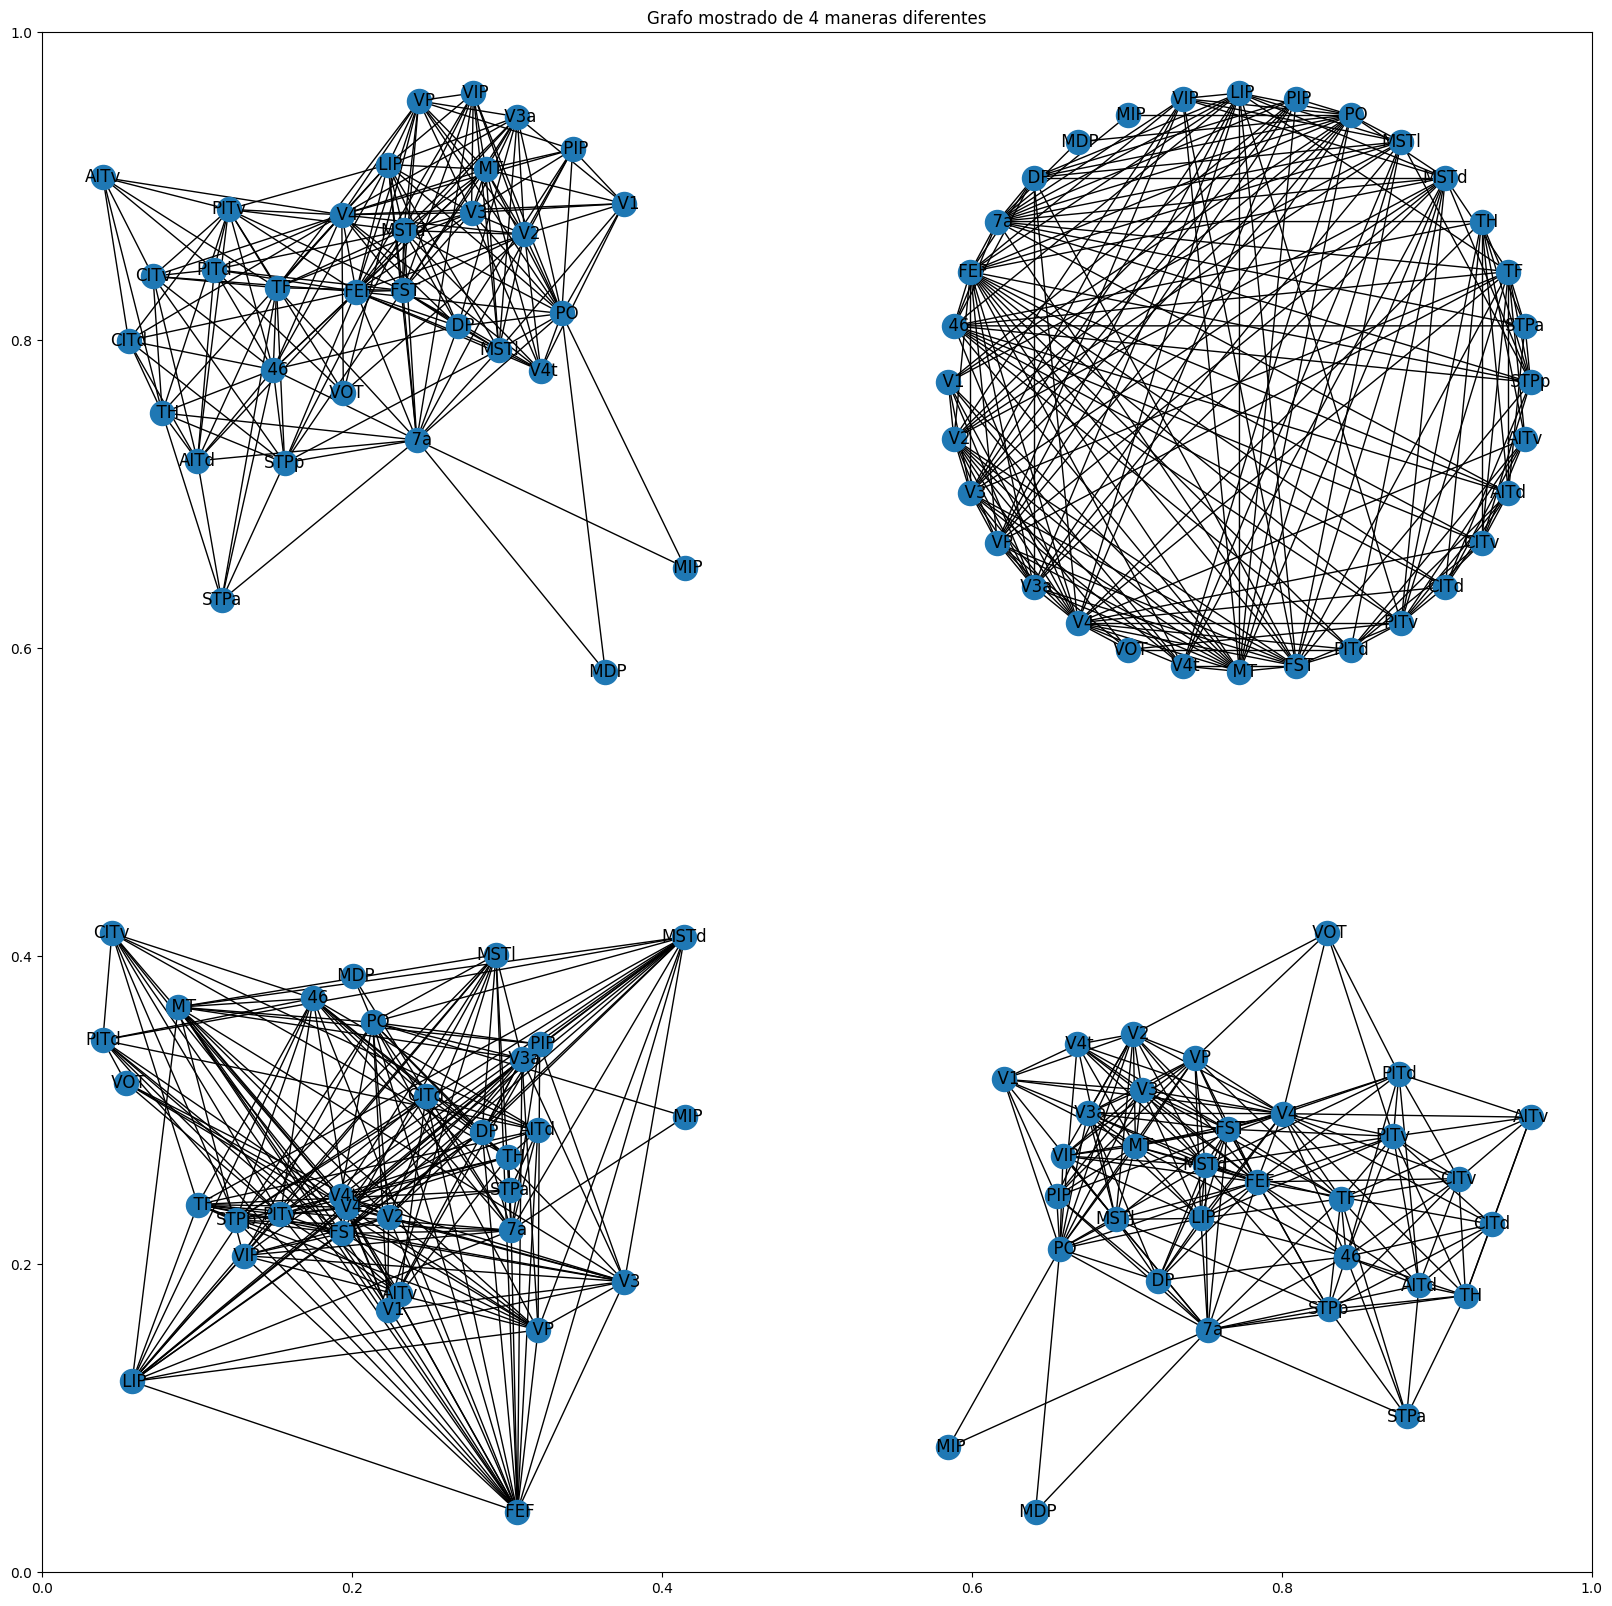

In [12]:
# mostramos el grafo de 4 maneras distintas

fig = plt.figure(figsize=(20, 20))
plt.title("Grafo mostrado de 4 maneras diferentes")

plt.subplot(2, 2, 1)
nx.draw(G1, labels=node_labels, with_labels=True, font_weight='regular')

# aquí está la forma SHELL
plt.subplot(2, 2, 2)
nx.draw_shell(G1, labels=node_labels, with_labels=True, font_weight='regular')

plt.subplot(2, 2, 3)
nx.draw_random(G1, labels=node_labels, with_labels=True, font_weight='regular')

plt.subplot(2, 2, 4)
nx.draw_spring(G1, labels=node_labels, with_labels=True, font_weight='regular')

In [15]:
# nodo con más conexiones
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt


nodomaximo = max(dict(G1.degree), key=dict(G1.degree).get)  # Esto debe ser un nombre único en cadena
print(f"Nodo con más conexiones: {nodomaximo}")

Nodo con más conexiones: 30


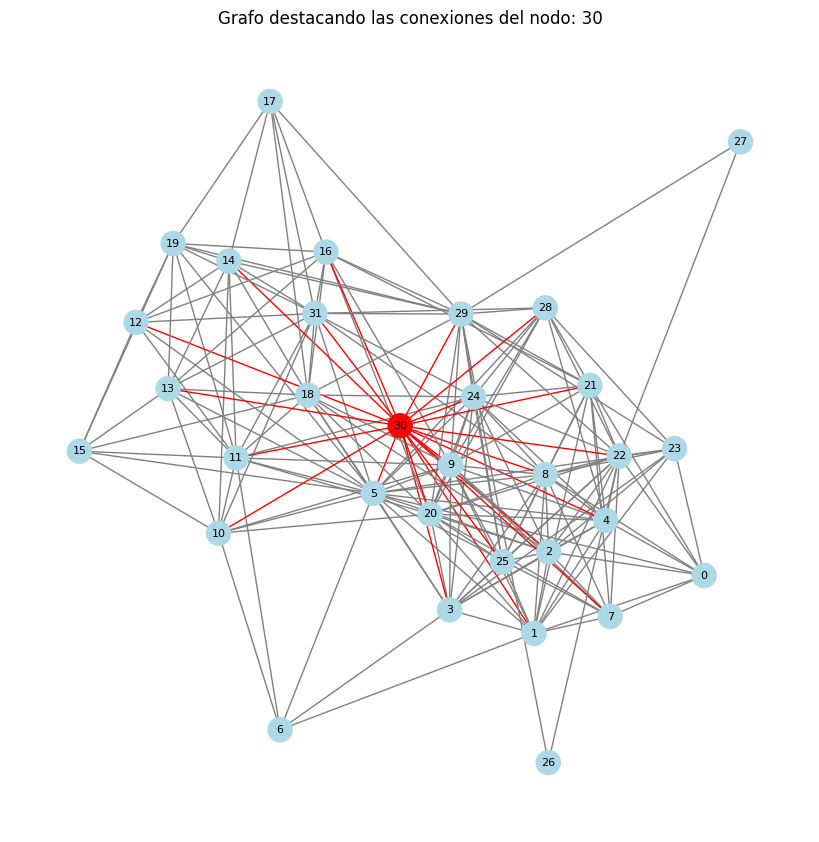

In [18]:
# quiero colorear el nodo con más conexiones

# aquí pongo rojo el nodo máximo y los demás azules
nodos = ["red" if node == nodomaximo else "lightblue" for node in G1.nodes]

# aquí quiero que las líneas sean rojas también, las que no son del nodo máximo las pongo grises
lineas = ["red" if nodomaximo in edge else "gray" for edge in G1.edges]

# Mostramos el grafo
plt.figure(figsize=(8, 8))
nx.draw_spring(G1, with_labels=True, node_color=nodos, edge_color=lineas, font_size=8)
plt.title(f"Grafo destacando las conexiones del nodo: {nodomaximo}")
plt.show()